# Case 1

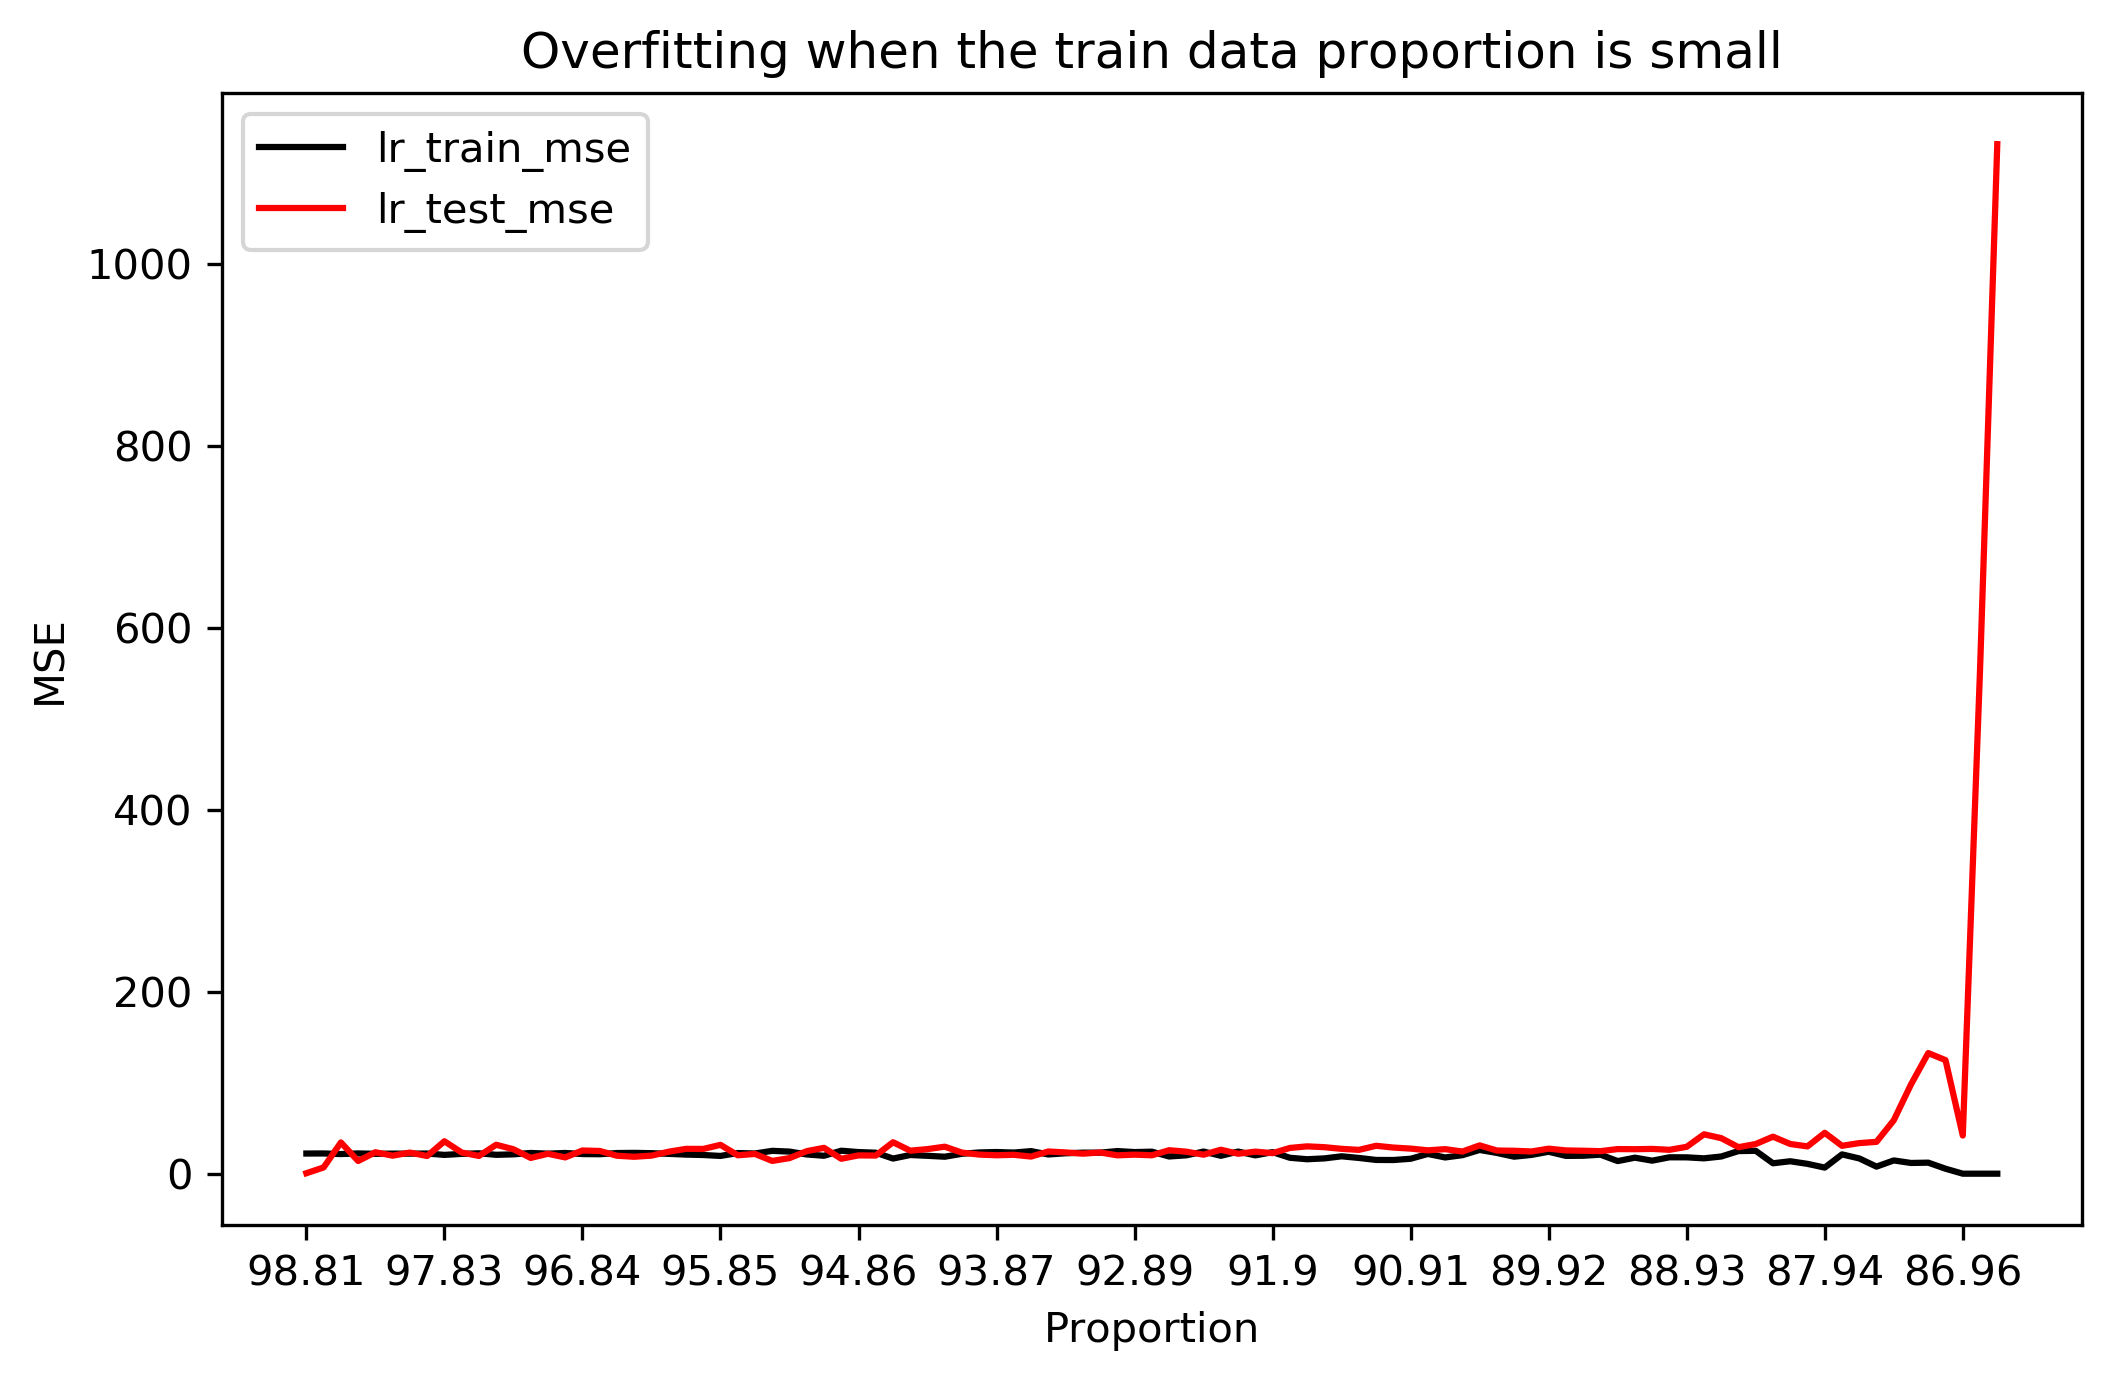

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
%matplotlib inline

dataset = load_boston()

test_size = range(1,100)

train_mse = []
test_mse = []
x = []

for i in test_size:
    
    X_train, X_test, Y_train, Y_test = train_test_split(dataset.data, dataset.target,test_size=i/100)

    #print("Train_data:{0},Test_data:{1}".format(len(X_train),len(X_test)))

    lr = LinearRegression().fit(X_train,Y_train)

    lr_train_data = lr.predict(X_train)
    lr_test_data = lr.predict(X_test)

    train_mse.append(mean_squared_error(lr_train_data,Y_train)) 
    test_mse.append(mean_squared_error(lr_test_data,Y_test))
    
    x.append(round(len(X_train)/(len(X_test)+len(X_train))*100,2))

plt.rcParams['figure.figsize'] = (8.0,5.0)
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300

plt.xlabel('Proportion')
plt.ylabel('MSE')
plt.xticks(range(1,100,8), x)

plt.plot(test_size,train_mse,linestyle="solid",color="black",label="lr_train_mse")
plt.plot(test_size,test_mse,linestyle="solid",color="red",label="lr_test_mse")

plt.title("Overfitting when the train data proportion is small")
plt.legend(loc="upper left")
plt.show()

# Case 2

In [4]:
import pandas as pd
from sklearn.datasets import load_boston
%matplotlib inline

dataset = load_boston()

data_x = pd.DataFrame(dataset.data,columns=dataset.feature_names)
data_y = pd.DataFrame(dataset.target,columns=['MEDV'])

boston = pd.concat([data_x, data_y], axis=1)
print("各属性の相関係数：ABS->DESC")
print(abs(boston.corr()[u'MEDV']).sort_values())

各属性の相関係数：ABS->DESC
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
AGE        0.376955
RAD        0.381626
CRIM       0.388305
NOX        0.427321
TAX        0.468536
INDUS      0.483725
PTRATIO    0.507787
RM         0.695360
LSTAT      0.737663
MEDV       1.000000
Name: MEDV, dtype: float64


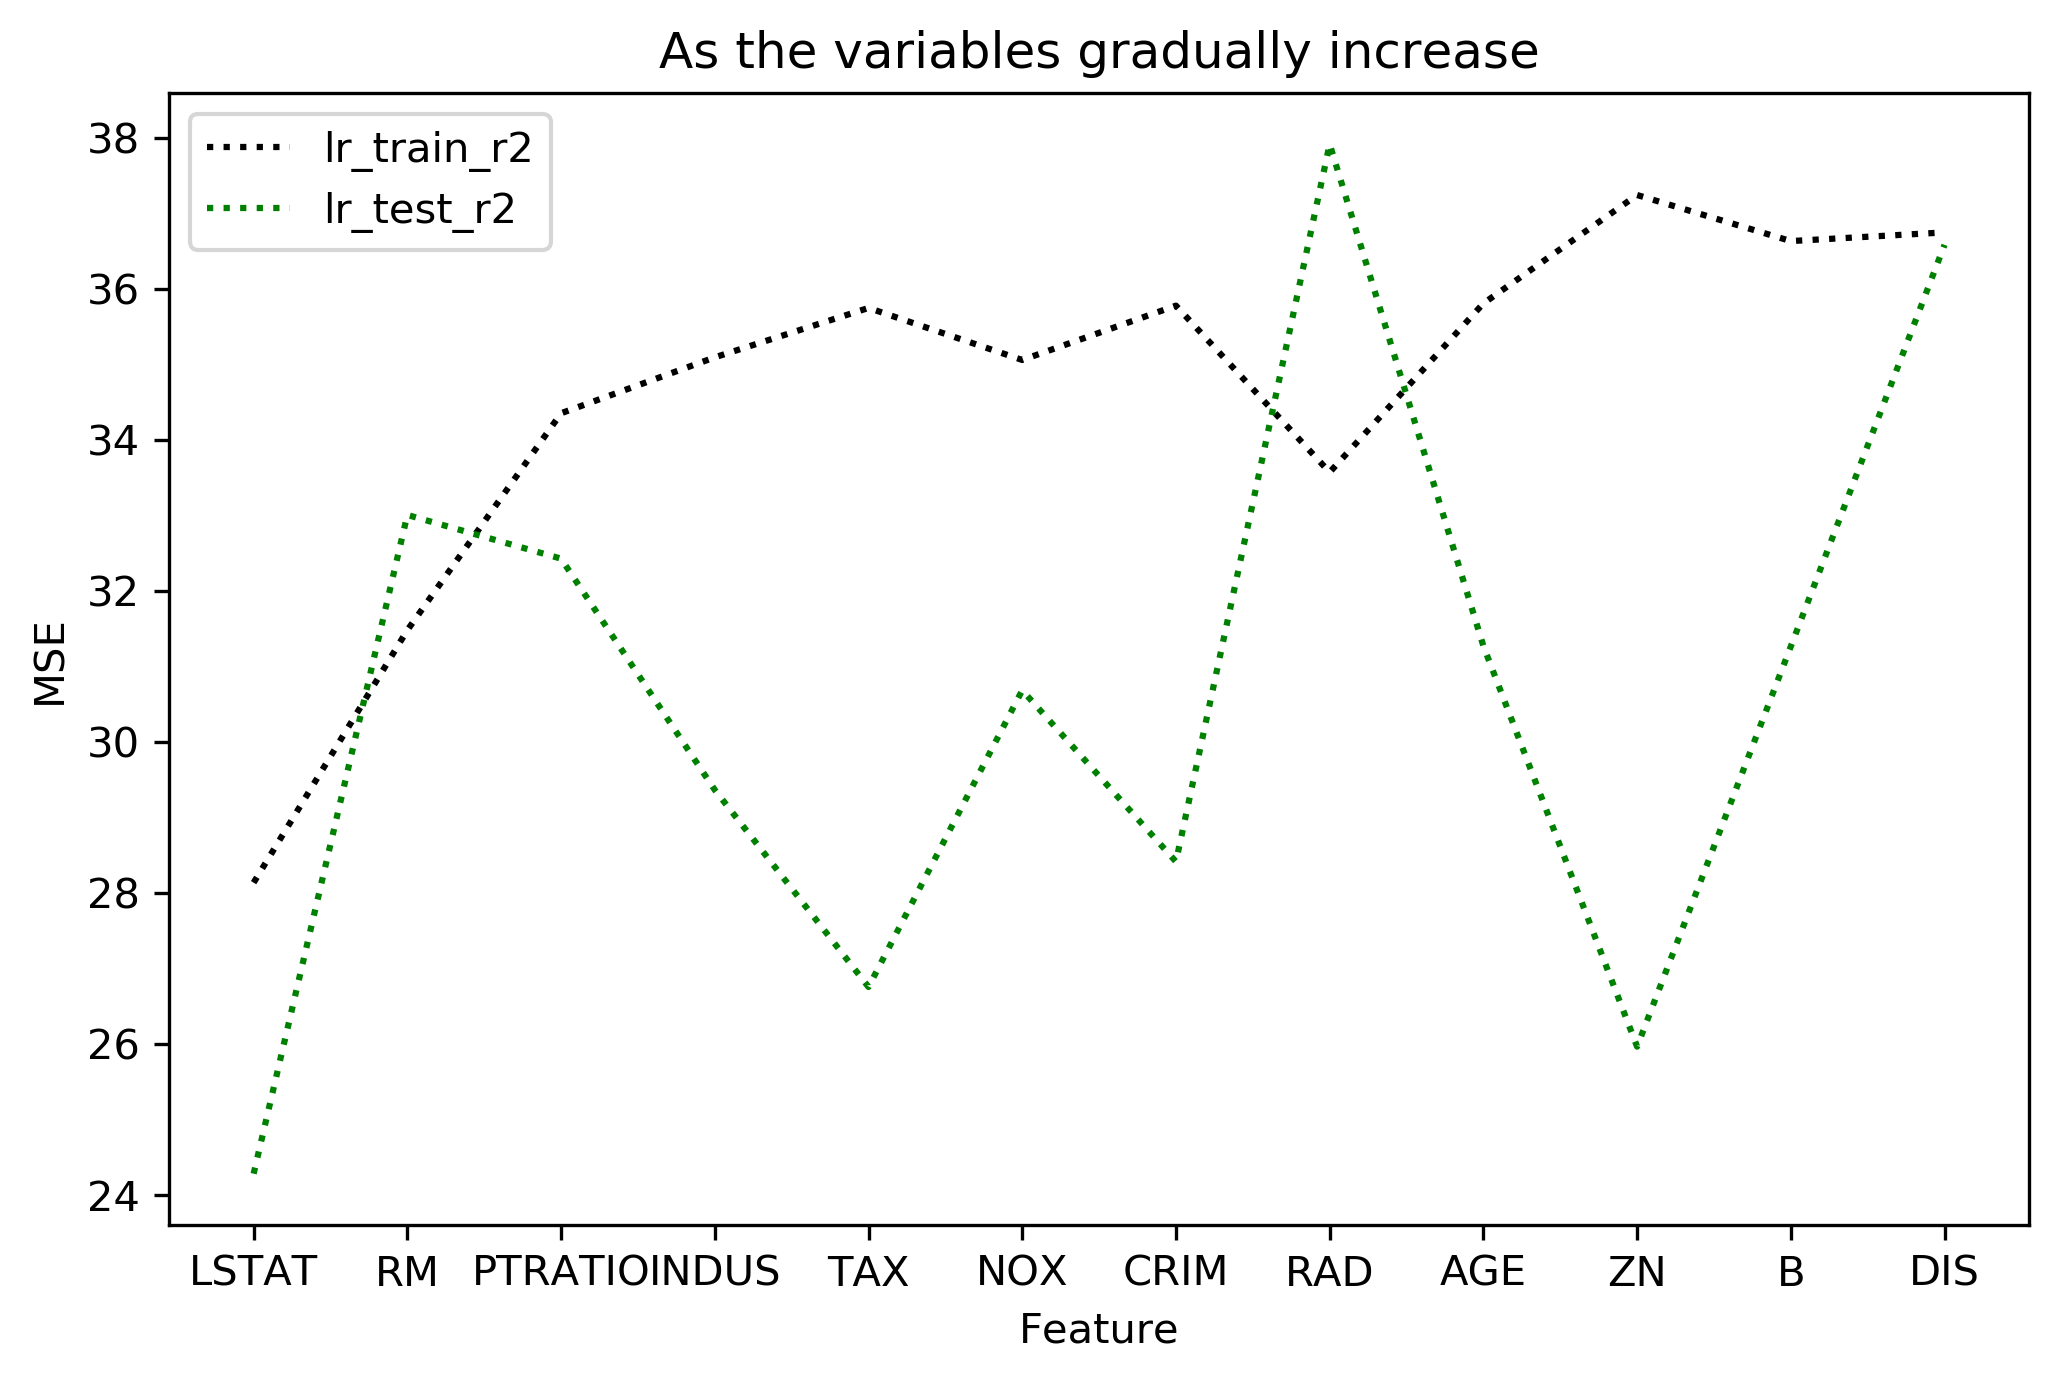

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split,KFold
from sklearn.datasets import load_boston
%matplotlib inline

dataset = load_boston()
dataset_order = [12,5,10,2,9,4,0,8,6,1,11,7,3]

x = []

train_mse = []
test_mse = []
train_r2 = []
test_r2 = []

lr = []

for i in range(0,12):
    #print(dataset.data)
    
    X_data = dataset.data[:,dataset_order[:i+1]]
    X_train, X_test, Y_train, Y_test = train_test_split(X_data, dataset.target)
    
    #print(type(X_test))
    
    lr = LinearRegression().fit(X_train,Y_train)
    
    lr_train_data = lr.predict(X_train)
    lr_test_data = lr.predict(X_test)

    train_mse.append(mean_squared_error(lr_train_data,Y_train)) 
    test_mse.append(mean_squared_error(lr_test_data,Y_test))
    train_r2.append(r2_score(Y_train,lr_train_data)*50) 
    test_r2.append(r2_score(Y_test,lr_test_data)*50) 
        
    x.append(dataset.feature_names[dataset_order[i]])

plt.rcParams['figure.figsize'] = (8.0,5.0)
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300

plt.xlabel('Feature')
plt.ylabel('MSE')
plt.xticks(range(0,13), x)

#plt.plot(train_mse,linestyle="solid",color="black",label="lr_train_mse")
#plt.plot(test_mse,linestyle="solid",color="green",label="lr_test_mse")
plt.plot(train_r2,linestyle=":",color="black",label="lr_train_r2")
plt.plot(test_r2,linestyle=":",color="green",label="lr_test_r2")


plt.title("As the variables gradually increase")
plt.legend(loc="upper left")
plt.show()

# Case 3

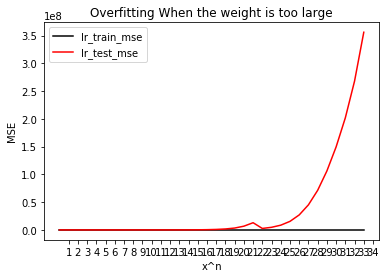

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

dataset = load_boston()

dataset_order = [12,5,10,2,9,4,0,8,6,1,11,7,3]

lr = []

train_mse = []
test_mse = []

X = dataset.data[:,np.newaxis,dataset_order[0]]
Y = pd.DataFrame(dataset.target,columns=['MEDV'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

for i in range(1,35):
    
    poly_features = PolynomialFeatures(degree=i, include_bias=False)
    X_poly_train = poly_features.fit_transform(X_train)
    #print(X_poly_train)
    X_poly_test = poly_features.fit_transform(X_test)
    lr = LinearRegression().fit(X_poly_train,Y_train)
    
    train_mse.append(mean_squared_error(lr.predict(X_poly_train),Y_train))
    test_mse.append(mean_squared_error(lr.predict(X_poly_test),Y_test))

plt.xlabel('x^n')
plt.ylabel('MSE')
plt.xticks(range(1,35))

plt.plot(train_mse,linestyle="solid",color="black",label="lr_train_mse")
plt.plot(test_mse,linestyle="solid",color="red",label="lr_test_mse")

plt.title("Overfitting When the weight is too large")
plt.legend(loc="upper left")
plt.show()


# Case 4

In [11]:
import time
import numpy as np
import matplotlib.pyplot as plt

from IPython import display
from sklearn import linear_model
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split,KFold
%matplotlib inline

dataset = load_boston()
X_data = dataset.data[:,np.newaxis,5]

train_mean_squared_error = []
test_mean_squared_error = []
train_r2_score = []
test_r2_score = []

kf = KFold(n_splits=20,shuffle=True)

i = 0

for train_index, test_index in kf.split(X_data, dataset.target):
    
    X_train = X_data[train_index]
    X_test = X_data[test_index]
    Y_train = dataset.target[train_index]
    Y_test = dataset.target[test_index]

    lr = linear_model.LinearRegression().fit(X_train,Y_train)
    Y_train_predict = lr.predict(X_train)
    Y_test_predict = lr.predict(X_test)

    #print('Coefficients:\n',lr.coef_)
    #print("train mean squared error:%.2f" % mean_squared_error(Y_train_predict,X_train))
    #print("test mean squared error:%.2f" % mean_squared_error(Y_test_predict,X_test))
    #print("train r2:%.2f" % r2_score(Y_train,Y_train_predict))
    #print("test r2:%.2f" % r2_score(Y_test,Y_test_predict))
    
    train_mean_squared_error.append(mean_squared_error(Y_train_predict,Y_train))
    test_mean_squared_error.append(mean_squared_error(Y_test_predict,Y_test))
    
    train_r2_score.append(r2_score(Y_train,Y_train_predict))
    test_r2_score.append(r2_score(Y_test,Y_test_predict))
    
    plt.scatter(X_train,Y_train,color='black')
    plt.scatter(X_test,Y_test,color='green')
    plt.plot(X_data,lr.predict(X_data),color='blue',linewidth=3)

    plt.xlabel('RM') 
    plt.ylabel('MEDV')
    i += 1
    plt.title(i)
    
    plt.axis([3, 9, 0, 55])
    
    plt.show()
    
    time.sleep(0.5)
    plt.ioff(); plt.show()
    display.clear_output(wait=True)
    
print("train data mean squared error:%.2f" % np.mean(train_mean_squared_error))
print("test data mean squared error:%.2f" % np.mean(test_mean_squared_error))
print("Progrem r2 score:%.2f" % np.mean(train_r2_score))

train data mean squared error:43.58
test data mean squared error:44.24
train data mean r2 score:0.48
test data mean r2 score:0.42


In [12]:
import time
import numpy as np
import matplotlib.pyplot as plt

from IPython import display
from sklearn import linear_model
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split,KFold
%matplotlib inline

dataset = load_boston()
X_data = dataset.data

train_mean_squared_error = []
test_mean_squared_error = []
train_r2_score = []
test_r2_score = []

kf = KFold(n_splits=4,shuffle=True)

i = 0

for train_index, test_index in kf.split(X_data, dataset.target):
    
    X_train = X_data[train_index]
    X_test = X_data[test_index]
    Y_train = dataset.target[train_index]
    Y_test = dataset.target[test_index]

    lr = linear_model.LinearRegression().fit(X_train,Y_train)
    Y_train_predict = lr.predict(X_train)
    Y_test_predict = lr.predict(X_test)
    
    train_mean_squared_error.append(mean_squared_error(Y_train_predict,Y_train))
    test_mean_squared_error.append(mean_squared_error(Y_test_predict,Y_test))
    
    train_r2_score.append(r2_score(Y_train,Y_train_predict))
    test_r2_score.append(r2_score(Y_test,Y_test_predict))
    
    plt.scatter(range(len(Y_train)),Y_train,color='black')
    #plt.scatter(dataset.data[:len(Y_test),12],Y_test,color='green')
    #plt.scatter(dataset.data[:len(Y_train),12],Y_train,color='black')
    plt.plot(lr.predict(X_train),color='blue',linewidth=3)

    plt.xlabel('RM') 
    plt.ylabel('MEDV')
    i += 1
    plt.title(i)
    
    plt.show()
    
    time.sleep(0.5)
    plt.ioff(); plt.show()
    display.clear_output(wait=True)

print("train data mean squared error:%.5f" % np.mean(train_mean_squared_error))
print("test data mean squared error:%.5f" % np.mean(test_mean_squared_error))
print("Progrem r2 score:%.5f" % np.mean(train_r2_score))

train data mean squared error:21.21917
test data mean squared error:27.03071
train data mean r2 score:0.74832


No handles with labels found to put in legend.


                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     891.3
Date:                Wed, 06 Feb 2019   Prob (F-statistic):               0.00
Time:                        21:37:32   Log-Likelihood:                -1523.8
No. Observations:                 506   AIC:                             3074.
Df Residuals:                     493   BIC:                             3128.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0929      0.034     -2.699      0.0

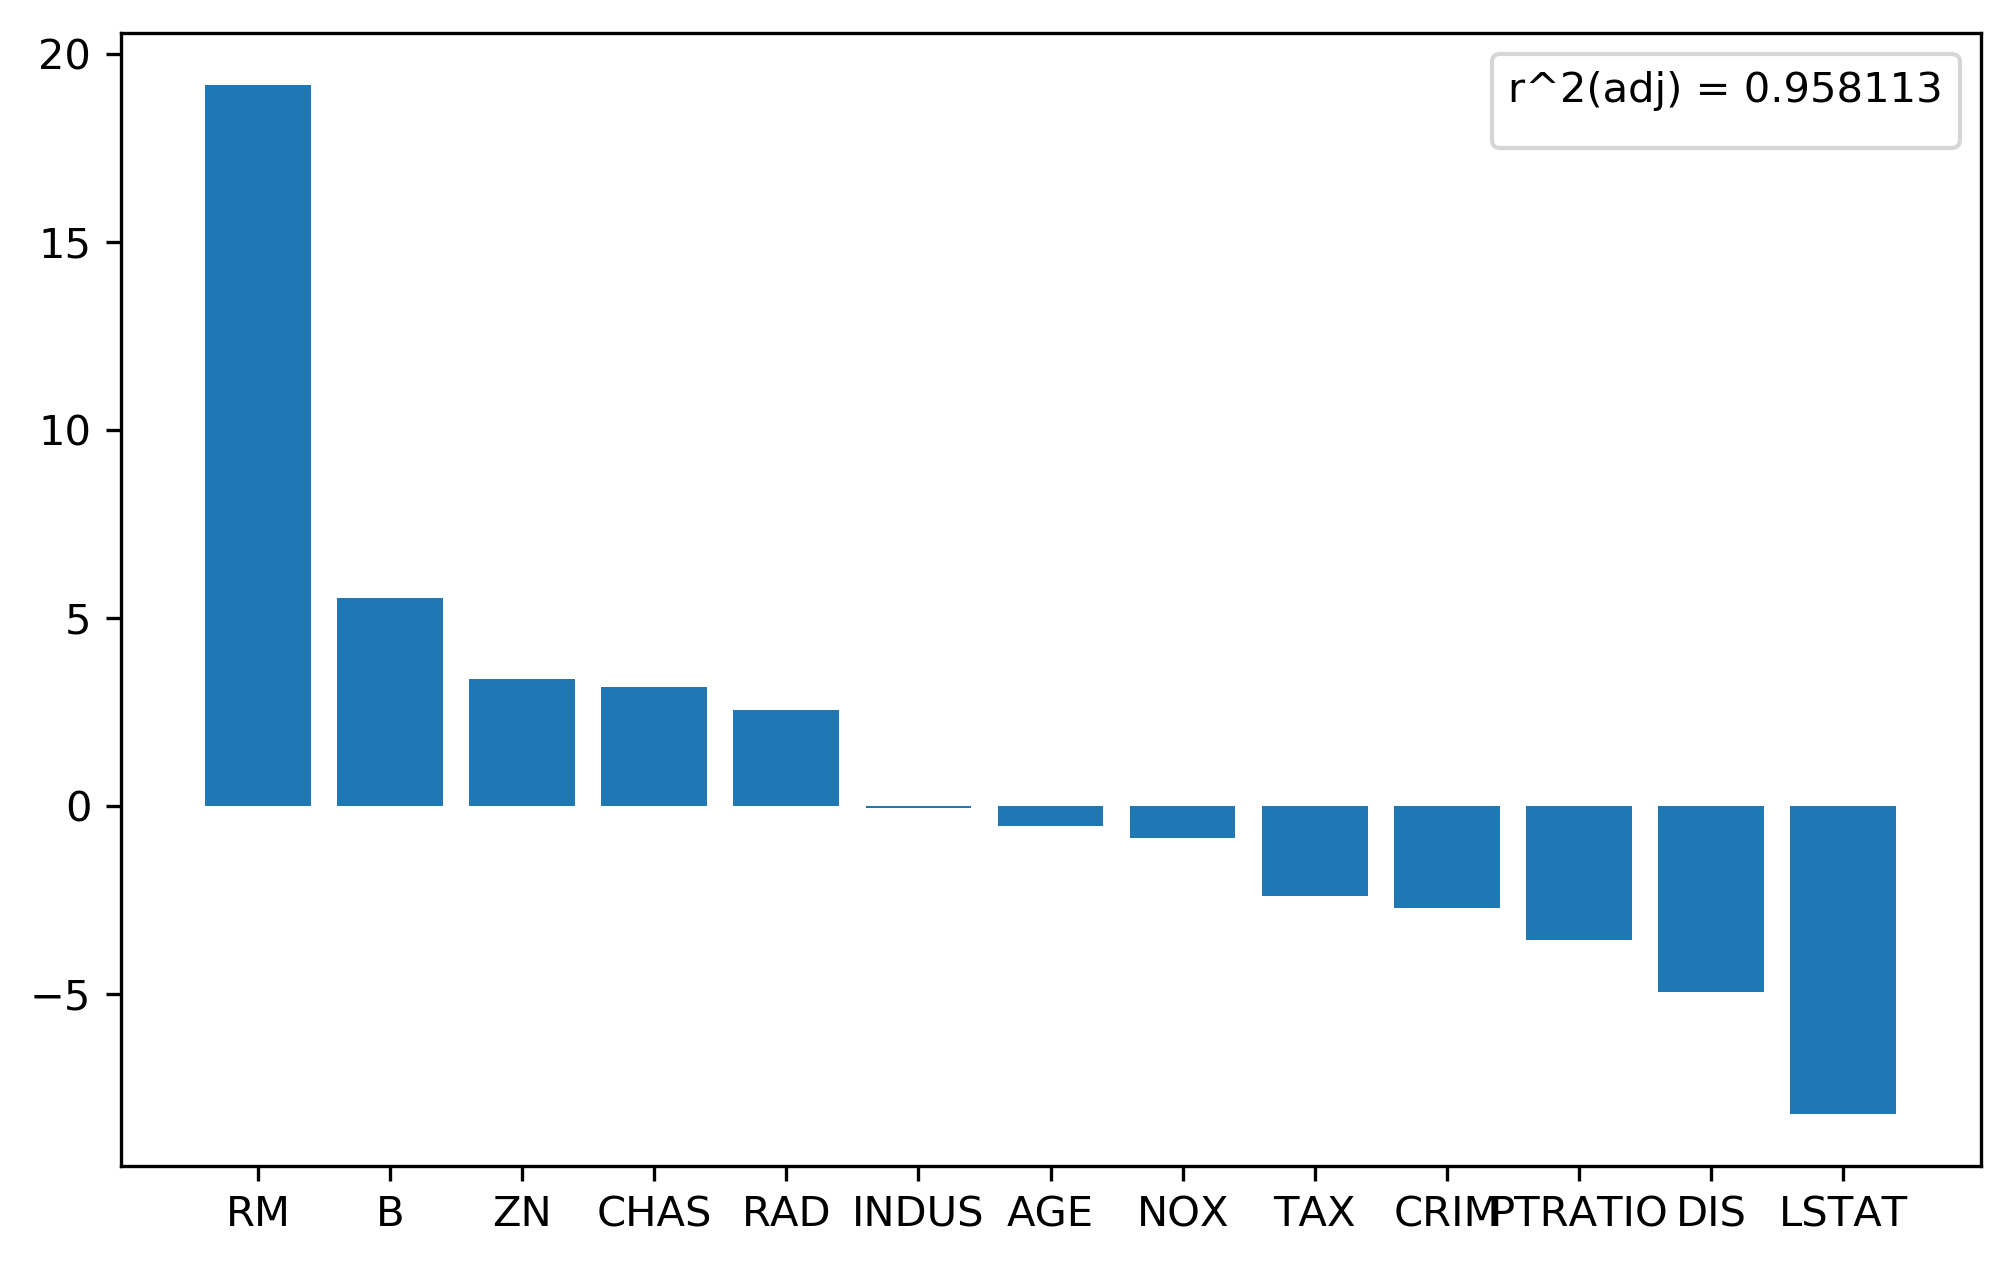

In [19]:
from sklearn import datasets
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np
 
def multi_regression(*feature_index):
    """
    重回帰分析
    http://www.randpy.tokyo/entry/2017/06/26/153800
    http://wcs.hatenablog.com/entry/2016/11/08/231703
    https://pythondatascience.plavox.info/scikit-learn/%E7%B7%9A%E5%BD%A2%E5%9B%9E%E5%B8%B0
    https://pythondatascience.plavox.info/matplotlib/%E6%A3%92%E3%82%B0%E3%83%A9%E3%83%95
    :return:
    """
    boston = datasets.load_boston()
    df = pd.DataFrame(boston.data)
    df.columns = boston.feature_names
    df['PRICE'] = pd.DataFrame(boston.target)
 
    x = df.loc[:, ['{0}'.format(x) for x in feature_index]]
    y = df['PRICE']
 
    model = smf.OLS(y, x)
    result = model.fit()
    print(result.summary())
 
    # numpy sort
    # https://qiita.com/supersaiakujin/items/c580f2aae90818150b35
    desc_idx = np.argsort(result.tvalues.values)[::-1]
    labels = []
    values = []
    for idx in desc_idx:
        labels.append(feature_index[idx])
        values.append(result.tvalues.values[idx])
     
    plt.rcParams['figure.figsize'] = (8.0,5.0)
    plt.rcParams['savefig.dpi'] = 300
    plt.rcParams['figure.dpi'] = 300
    
    plt.bar(labels, values)
    plt.legend(title="r^2(adj) = {0:.6}".format(result.rsquared_adj))
 
    plt.show()
 
 
if __name__ == "__main__":
    multi_regression('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT')
    # multi_regression('RM', 'AGE', 'TAX', 'B')